In [1]:
import pandas as pd
import numpy as np
import glob
from tqdm import tqdm
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
annotation = pd.read_csv("/content/drive/MyDrive/Projects/YOLOv5_Blood_cells_Detection/Data/blood-cell-detection-dataset/annotations.csv")
annotation.head()

image       xmin       ymin        xmax       ymax label
0  image-100.png   0.000000   0.000000   25.190198  40.816803   rbc
1  image-100.png  15.010502   0.000000   68.337223  23.527421   rbc
2  image-100.png  25.017503  16.021004   78.374562  73.735123   rbc
3  image-100.png  75.565928   1.061844  140.248541  45.591599   rbc
4  image-100.png  77.483081  23.290548  131.936989  74.806301   rbc

In [3]:
images = annotation.image.unique()
#images

In [4]:
train_images = images[:70]
test_images = images[70:]

In [5]:
import os
working_dir = '/content/drive/MyDrive/Projects/YOLOv5_Blood_cells_Detection'
train_dir = os.path.join( working_dir, 'train')
test_dir = os.path.join( working_dir, 'test')

In [6]:
yolo_train_dir = "/content/drive/MyDrive/Projects/YOLOv5_Blood_cells_Detection/train"
yolo_test_dir = "/content/drive/MyDrive/Projects/YOLOv5_Blood_cells_Detection/test"

for dd in [yolo_train_dir, yolo_test_dir]:
    for ss in ["images", "labels"]:
        print(os.path.join(dd, ss))
        os.makedirs(os.path.join(dd, ss), exist_ok=True)

/content/drive/MyDrive/Projects/YOLOv5_Blood_cells_Detection/train/images
/content/drive/MyDrive/Projects/YOLOv5_Blood_cells_Detection/train/labels
/content/drive/MyDrive/Projects/YOLOv5_Blood_cells_Detection/test/images
/content/drive/MyDrive/Projects/YOLOv5_Blood_cells_Detection/test/labels


(256, 256, 3)


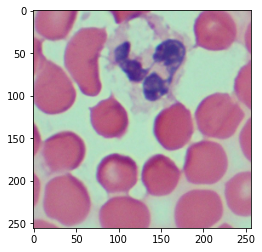

In [7]:
image = cv2.imread('/content/drive/MyDrive/Projects/YOLOv5_Blood_cells_Detection/Data/blood-cell-detection-dataset/images/image-1.png')
image = image[:,:,2::-1]
print(image.shape)
plt.imshow(image)

In [8]:
WIDTH = 256
HEIGHT = 256
cells_id = {
    'rbc': 0,
    'wbc': 1
}

In [9]:
cells_classes = list(cells_id.keys())
cells_classes

['rbc', 'wbc']

In [10]:
for image in train_images:
    lables_file = os.path.join(yolo_train_dir, 'labels', image.replace(".png", ".txt"))
    with open(lables_file, "w") as wobj:
        for box in annotation.loc[annotation.image == image].values:
            wobj.write("%d %f %f %f %f \n" % (
                cells_id[box[5]],
                ((box[3]+box[1])/2.0) / WIDTH,
                ((box[4]+box[2])/2.0) / HEIGHT,
                (box[3]-box[1]) / WIDTH,
                (box[4]-box[2]) / HEIGHT
            ))
        
for image in test_images:
    lables_file = os.path.join(yolo_test_dir, 'labels', image.replace(".png", ".txt"))
    with open(lables_file, "w") as wobj:
        for box in annotation.loc[annotation.image == image].values:
            wobj.write("%d %f %f %f %f \n" % (
                cells_id[box[5]],
                ((box[3]+box[1])/2.0) / WIDTH,
                ((box[4]+box[2])/2.0) / HEIGHT,
                (box[3]-box[1]) / WIDTH,
                (box[4]-box[2]) / HEIGHT
            ))

In [11]:
SIZE_W = 640
SIZE_H = 640

In [12]:
SIZE = (SIZE_W, SIZE_H)
import pdb
def replace_image(src_file, dst_file, size=SIZE):
  #pdb.set_trace()
  image = cv2.imread(src_file) 
  image = cv2.resize(image, size)
  cv2.imwrite(dst_file, image)

In [13]:
train_images_dir = "/content/drive/MyDrive/Projects/YOLOv5_Blood_cells_Detection/Data/blood-cell-detection-dataset/images"

for image in train_images:
  #pdb.set_trace()
  src_file = os.path.join(train_images_dir , image)
  dst_file = os.path.join(yolo_train_dir, 'images', image)
  replace_image(src_file, dst_file)
        
for image in test_images:
    src_file = os.path.join(train_images_dir , image)
    dst_file = os.path.join(yolo_test_dir, 'images', image)
    replace_image(src_file, dst_file)

/content/drive/MyDrive/Projects/YOLOv5_Blood_cells_Detection/train/images/image-100.png
/content/drive/MyDrive/Projects/YOLOv5_Blood_cells_Detection/train/labels/image-100.txt


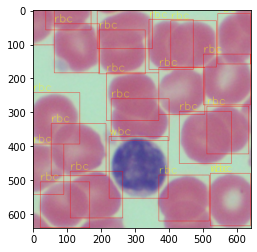

In [14]:
def draw_image(image_file, label_file, class_names):   
    image = cv2.imread(image_file)
        
    with open(label_file) as fobj:
        while True:            
            item = fobj.readline()
            if item is None or len(item)<=0:
                break
                
            item = item.split()
            
            lb = int(item[0])
            xc = float(item[1]) * SIZE_W
            yc = float(item[2]) * SIZE_H
            w = float(item[3]) * SIZE_W
            h = float(item[4]) * SIZE_H
        
            image = cv2.rectangle(image, (int(xc - w/2), int(yc - h/2)), (int(xc + w/2), int(yc + h/2)), (0,0,255), 1)
            image = cv2.putText(image, class_names[lb], (int(xc - w/2), int(yc - h/2 - 5)), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 255, 255), 1)
        
    return image

train_file = train_images[0]
image_file = os.path.join(yolo_train_dir, 'images', train_file)
label_file = os.path.join(yolo_train_dir, 'labels', train_file.replace(".png", ".txt"))

print(image_file)
print(label_file)

image = draw_image(image_file, label_file, cells_classes)
image = image[:,:,2::-1]
plt.imshow(image);

In [15]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt
%cd -

Cloning into 'yolov5'...
remote: Enumerating objects: 15236, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15236 (delta 6), reused 12 (delta 4), pack-reused 15218
Receiving objects: 100% (15236/15236), 14.17 MiB | 17.87 MiB/s, done.
Resolving deltas: 100% (10449/10449), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not current

In [16]:
!cat yolov5/data/coco128.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license
# COCO128 dataset https://www.kaggle.com/ultralytics/coco128 (first 128 images from COCO train2017) by Ultralytics
# Example usage: python train.py --data coco128.yaml
# parent
# ├── yolov5
# └── datasets
#     └── coco128  ← downloads here (7 MB)


# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/coco128  # dataset root dir
train: images/train2017  # train images (relative to 'path') 128 images
val: images/train2017  # val images (relative to 'path') 128 images
test:  # test images (optional)

# Classes
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handba

In [17]:
yaml_file="yolov5/data/blood_cell.yaml"
train_images_dir = os.path.join("..", yolo_train_dir, "images")
val_images_dir = os.path.join("..", yolo_test_dir, "images")


names_str=""
for item in cells_classes:
    names_str=names_str + ", \'%s\'"%item
names_str= "names: ["+names_str[1:]+"]"

with open(yaml_file, "w") as wobj:
    wobj.write("train: %s\n"%train_images_dir)
    wobj.write("val: %s\n"%val_images_dir)
    wobj.write("nc: %d\n"%len(cells_classes))
    wobj.write(names_str+"\n")

In [ ]:
!pip install wandb
import wandb
wandb.login()

In [20]:
%cd yolov5
!bash /content/yolov5/data/scripts/download_weights.sh

[Errno 2] No such file or directory: 'yolov5'
/content/yolov5
100% 3.87M/3.87M [00:00<00:00, 241MB/s]

100% 14.1M/14.1M [00:00<00:00, 295MB/s]

100% 40.8M/40.8M [00:05<00:00, 7.82MB/s]

100% 89.3M/89.3M [00:09<00:00, 10.2MB/s]

100% 166M/166M [00:27<00:00, 6.43MB/s]

100% 6.86M/6.86M [00:00<00:00, 15.7MB/s]

100% 24.8M/24.8M [00:01<00:00, 13.9MB/s]

100% 69.0M/69.0M [00:00<00:00, 339MB/s]

100% 147M/147M [01:02<00:00, 2.48MB/s]

100% 270M/270M [00:30<00:00, 9.37MB/s]

100% 4.87M/4.87M [00:00<00:00, 22.0MB/s]

100% 10.5M/10.5M [00:00<00:00, 12.0MB/s]

100% 24.9M/24.9M [00:03<00:00, 7.50MB/s]

100% 50.9M/50.9M [00:06<00:00, 8.24MB/s]

100% 92.0M/92.0M [00:10<00:00, 8.94MB/s]

100% 4.11M/4.11M [00:02<00:00, 1.48MB/s]

100% 14.9M/14.9M [00:03<00:00, 4.05MB/s]

100% 42.4M/42.4M [00:04<00:00, 9.39MB/s]

100% 91.9M/91.9M [00:10<00:00, 9.54MB/s]

100% 170M/170M [00:15<00:00, 11.2MB/s]



In [23]:
!mv *.pt weights
!ls weights

mv: cannot stat '*.pt': No such file or directory
yolov5l6.pt	yolov5m6.pt	yolov5n6.pt	yolov5s6.pt	yolov5x6.pt
yolov5l-cls.pt	yolov5m-cls.pt	yolov5n-cls.pt	yolov5s-cls.pt	yolov5x-cls.pt
yolov5l.pt	yolov5m.pt	yolov5n.pt	yolov5s.pt	yolov5x.pt
yolov5l-seg.pt	yolov5m-seg.pt	yolov5n-seg.pt	yolov5s-seg.pt	yolov5x-seg.pt


In [24]:
!python train.py --data data/blood_cell.yaml --batch-size 4 --epochs 300 --img-size 640 --project runs/train --name blood_cell --weights weights/yolov5s.pt --device 0

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: ajitwankhede77. Use `wandb login --relogin` to force relogin
train: weights=weights/yolov5s.pt, cfg=, data=data/blood_cell.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=blood_cell, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-108-g4db6757 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tes

In [26]:
!python detect.py --weights runs/train/blood_cell/weights/best.pt --source /content/drive/MyDrive/Projects/YOLOv5_Blood_cells_Detection/Data/blood-cell-detection-dataset/images/image-1.png --name blood_cell --project runs/detect

detect: weights=['runs/train/blood_cell/weights/best.pt'], source=/content/drive/MyDrive/Projects/YOLOv5_Blood_cells_Detection/Data/blood-cell-detection-dataset/images/image-1.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=blood_cell, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-108-g4db6757 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/Projects/YOLOv5_Blood_cells_Detection/Data/blood-cell-detection-dataset/images/image-1.png: 640x640 23 rbcs, 1 wbc, 14.8ms
Speed: 0.7ms pre-process, 14.8ms inference, 2.4ms NMS per image at shape (1, 3, 64

In [27]:
!mkdir -p tmp
!cp runs/train/blood_cell/test_batch0_labels.jpg tmp/0.jpg
!cp runs/train/blood_cell/test_batch0_pred.jpg tmp/1.jpg
!ffmpeg -r 1 -i tmp/%d.jpg -r 1 -y tmp/out.gif

cp: cannot stat 'runs/train/blood_cell/test_batch0_labels.jpg': No such file or directory
cp: cannot stat 'runs/train/blood_cell/test_batch0_pred.jpg': No such file or directory
ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-libru

In [28]:
!ls -l runs/detect/blood_cell

total 0


In [ ]:
img = cv2.imread("runs/detect/blood_cell/image-1.png")
plt.imshow(img[:,:,2::-1]);

In [30]:
import torch

model = torch.hub.load('/content/yolov5', 'custom', path='runs/train/blood_cell/weights/best.pt', source='local')
# Images
imgs = ['/content/drive/MyDrive/Projects/YOLOv5_Blood_cells_Detection/Data/blood-cell-detection-dataset/images/image-1.png']  # batch of images

# Inference
results = model(imgs)

# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0] 

YOLOv5 🚀 v7.0-108-g4db6757 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)



[Errno 2] No such file or directory: '/usr/local/lib/python3.8/dist-packages/setuptools-57.4.0.dist-info/METADATA'


Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
image 1/1: 256x256 23 rbcs, 1 wbc
Speed: 17.5ms pre-process, 13.7ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)
Saved 1 image to runs/detect/exp


xmin        ymin        xmax        ymax  confidence  class name
0    74.344543  167.974106  124.114250  215.766953    0.952114      0  rbc
1   189.401093    0.000000  239.100449   48.409199    0.944598      0  rbc
2   165.841003  209.571945  223.783081  255.289093    0.944597      0  rbc
3    11.535174  192.202682   68.425819  254.276718    0.944398      0  rbc
4   141.866425  108.113380  188.582458  165.364700    0.943729      0  rbc
5   225.294266  189.384567  255.811020  243.122070    0.942625      0  rbc
6   177.159760  154.109253  229.982956  205.152863    0.942270      0  rbc
7   127.359329  169.485626  172.798584  218.663742    0.940390      0  rbc
8   189.393402   96.087784  248.233749  151.668381    0.938001      0  rbc
9    65.479324   95.889275  112.208794  153.117325    0.934958      0  rbc
10   76.380516  217.886459  139.439285  256.000000    0.934592      0  rbc
11   36.518810   18.645853   85.391273  102.663185    0.933246      0  rbc
12    0.499979    0.010953   53.678051   35.584187    0.929663      0  rbc
13    9.908920  140.896713   62.979347  192.377594    0.923662      0  rbc
14   81.587700    2.291980  190.208847  121.511185    0.915469      1  wbc
15    0.000000   35.979916   51.379059  126.396996    0.901074      0  rbc
16  235.785431   56.115528  255.858521  118.547264    0.883775      0  rbc
17  242.398056  119.394730  256.000000  183.653671    0.805364      0  rbc
18    0.093416  185.491470    8.611562  239.771637    0.697776      0  rbc
19    0.000000  123.868202    9.660152  180.932907    0.694843      0  rbc
20  248.368042    6.634544  256.000000   56.815289    0.655857      0  rbc
21    0.000000  245.794312   40.518856  256.000000    0.550032      0  rbc
22   83.234535    0.206969  141.220016   18.887381    0.405542      0  rbc
23  200.751144  248.892868  244.495361  255.749222    0.352327      0  rbc